# Um Estudo Probabilístico do Jogo Zigue-Zague

> **Docentes:** <br>
> Profa. Evelize Aparecida dos Santos Ferracini (IFMT) <br>
> Profa. Anne Raphaela Ledesma Cerqueira (IFMT) <br>
> Prof. Valdiego Siqueira Melo (IFMT) <br> <br>
> **Discente:** Michel Ferracini (IFMT)

## Introdução

Zigue-Zague é um jogo de tabuleiro há muito tempo utilizado em aulas de Matemática para ensinar e treinar as operações básicas. Os estudantes envolvidos em uma partida, fazem uma espécie de corrida com suas peças pelo tabuleiro, sendo vencedor aquele que primeiro alcançar a última fileira. A decisão sobre qual caminho um determinado jogador vai seguir com sua peça é tomada com base nos resultados obtidos no lançamento de três dados de seis faces e pelas casas disponíveis para o mesmo na próxima fileira do tabuleiro. Assim, o jogo é direcionado por eventos aleatórios e pelas habilidades de cada jogador em realizar operações básicas. 

O Zigue-Zague é composto pelos seguintes materiais:

- tabuleiro, conforme mostra a figura abaixo - ver <a href="#silva-kodama">SILVA e KODAMA ($2011$)</a>;
- três dados de seis faces, numerados de $1$ a $6$;
- um marcador para cada jogador.

<center>
    <a name="tabuleiro"></a>
    <img src="img/tabuleiro_zigue_zague.png" width="300" height="350">
</center>
<a name="citacaoSilvaKodama_unesp"></a>
O objetivo do jogo é alcançar a linha de chegada realizando operações de adição e subtração, ou seja, resolvendo expressões numéricas envolvendo adição e subtração. As regras utilizadas, como descritas em <a href="#silva-kodama">SILVA e KODAMA ($2011$)</a> e em <a href="#ibilce-unesp">UNESP/IBILCE</a>, são as seguintes:

1. Todos os marcadores são colocados na linha de partida.

2. Os jogadores se revezam lançando os três dados, em alguma ordem.

3. Em cada lançamento, o jogador deve realizar o cálculo de uma expressão numérica, envolvendo os números que foram obtidos no lançamento e as operações de adição e subtração, em qualquer ordem. Cada jogador deve comunicar as operações realizadas e o resultado aos demais jogadores.

4. No primeiro movimento o jogador deverá colocar seu marcador em uma casa vaga da primeira linha, que contenha o resultado de sua expressão numérica.

5. Nas demais jogadas, o jogador deverá deslocar seu marcador para o resultado de sua expressão numérica, desde que esteja em casa desocupada, vizinha (adjacente) à sua, na diagonal, horizontal ou vertical.

6. Caso não seja possível movimentar seu marcador ou haja erro de cálculo, detectado pelo adversário, o jogador passa a vez.

7. Vence o jogo, o primeiro que alcançar a linha de chegada.

Tradicionalmente, o jogo Zigue-Zague é aplicado com a intenção de desenvolver as habilidades de resolução de expressões numéricas envolvendo as operações de adição e subtração e cálculo mental de forma a incentivar a autonomia dos jogadores. Porém em <a href="#silva-kodama">SILVA e KODAMA ($2011$)</a> um estudo mais detalhado é realizado, com o principal objetivo de mapear as escolhas de jogadas que, a cada rodada, aumentam suas possibilidades de vitória.

Entretanto, pode-se abordar esse jogo de uma outra perpectiva, através dos seguintes questionamentos:

1. Qual o total de caminhos no tabuleiro? Definimos como caminho uma sequência de $11$ (onze) casas do tabuleiro, da primeira até a última linha, que se encadeiam de acordo com as regras do jogo.
2. Todos os caminhos possuem mesma chance de vitória?
3. Existe alguma estratégia geral vencedora? Isto é, existe alguma estratégia baseada nos caminhos possíveis e na forma como se distribuem pelo tabuleiro que potencializa as chances de vitória?

Com o objetivo de responder estas perguntas, utilizaremos a linguagem de programação *Python* (versão $3.8.10$), inicialmente para registrar e contar o total de caminhos no tabuleiro. Depois, construiremos um espaço de probabilidade para o Zigue-Zague. Para tanto, vamos descrever o experimento aleatório que ocorre no desenvolvimento do jogo, caracterizar um espaço amostral, estabelecer uma $\sigma-\mbox{álgebra}$ de eventos e definir uma medida de probabilidade sobre tal $\sigma-\mbox{álgebra}$.

No processo de construção do espaço de probabilidade, seguiremos desenvolvendo e utilizando códigos *Python* para agilizar (ou até mesmo viabilizar) os processos.

Para modelar os caminhos, definiremos variáveis aleatórias e vetores aleatórios.

Finalmente, analisaremos as probabilidades de vitória de cada caminho (ou vetor aleatório) e faremos um estudo da distribuição dos caminhos pelo tabuleiro, de acordo com as probabilidades de vitória que um jogador possui quando escolhe qual percorrer.
<a name="citacaoJames"></a>
De modo geral, para cada definição, propriedade ou teorema utilizado neste texto, nossa principal referência será o livro **Probabilidade: um curso em nível intermediário** de Barry R. James (ver <a href="#james">JAMES ($2011$)</a>). Quando outra referência é utilizada, citamos explicitamente no decorrer do texto.

## Caminhos no Tabuleiro

Nossa primeira meta é mapear todo o tabuleiro, ou seja, registrar cada possível caminho de ser percorrido e efetuar a contagem dos mesmos.

Nas próximas células, apresentamos o código que cumpre essa meta proposta. Para facilitar, tomamos apenas uma parte do tabuleiro (destacado na figura abaixo como tabuleiro de teste), com quatro linhas e três colunas, que utilizamos como meio de controle da corretude do código, uma vez que para estas dimensões é fácil registrar e contar manualmente os caminhos. Posteriormente ampliamos e aplicamos os mesmos procedimentos para o tabuleiro completo.

<center>
    <img src="img/tabuleiro_zigue_zague_destacado.png" width="300" heigth="350">
</center>

A função **listaProximaJogada()**, implementada abaixo, sempre será utilizada como auxiliar para determinar as possibilidades de avanço no tabuleiro. Por exemplo, estando na posição referente a primeira linha e primeira coluna no tabuleiro de teste (que possui valor  7), as regras do jogo permitem avançar somente para a segunda linha, na primeira ou segunda coluna (com valores 2 ou 8, respectivamente), sendo a função listaProximaJogada() responsável por estabelecer essa restrição.

Os argumentos (ou entradas) da função são a posição atual (posicaoAtual) e o maior índice das colunas (colunaMAX). No tabuleiro de teste temos 3 colunas, enumeradas de 0 (zero) até 2, de modo que o maior índice deverá ser 2.
    
O retorno da função (ou saída) é uma lista com 2 ou 3 elementos. Por exemplo, se no tabuleiro de teste a coluna for 0 (zero), então o retorno será a lista [0, 1]; se a coluna for 1, então o retorno será [0, 1, 2].

In [1]:
def listaProximaJogada(posicaoAtual, colunaMAX):
    if posicaoAtual == 0:
        return [0, 1]
    elif posicaoAtual == colunaMAX:
        return [colunaMAX - 1, colunaMAX]
    elif 0 < posicaoAtual < colunaMAX:
        return [posicaoAtual - 1, posicaoAtual, posicaoAtual + 1]
    else:
        return []

print(f'Exemplo de retorno para posição 1 e maior índice 2: {listaProximaJogada(1, 2)}')

Exemplo de retorno para posição 1 e maior índice 2: [0, 1, 2]


Na célula abaixo, definimos a função **totalCaminhosTeste()**, que partindo de cada possível posição na primeira linha, usa a função listaProximaJogada() para determinar as possibilidades de avançar e, consequentemente, retorna uma lista com todos os possíveis caminhos no tabuleiro de teste.

In [2]:
def totalCaminhosTeste():
    # Modelo do tabuleiro de teste:
    tab = [
        [7, 5, 6], # linha 1 = tab[0] - Início do jogo
        [2, 8, 1], # linha 2 = tab[1]
        [7, 3, 2], # linha 3 = tab[2]
        [5, 8, 7], # linha 4 = tab[3] - Fim do jogo
    ]
    colunaMAX = 2 # Maior índice das colunas do tabuleiro.
    caminhos = [] # Lista para receber os caminhos.
    # Laços para construir todos os possíveis caminhos no tabuleiro 4 X 3:
    for p1 in [0, 1, 2]: # p1 é a posição na linha 1, p2 é a posição na linha 2, etc.
        for p2 in listaProximaJogada(p1, colunaMAX):
            for p3 in listaProximaJogada(p2, colunaMAX):
                for p4 in listaProximaJogada(p3, colunaMAX):
                    caminhos.append([tab[0][p1], tab[1][p2], tab[2][p3], tab[3][p4]])
    return caminhos

print('Todos os possíveis caminhos no tabuleiro 4 X 3:\n')
for caminho in totalCaminhosTeste():
    print(caminho, end=' ')
                  
print(f'\n\nTotal de caminhos distintos no tabuleiro 4 X 3: {len(totalCaminhosTeste())}')

Todos os possíveis caminhos no tabuleiro 4 X 3:

[7, 2, 7, 5] [7, 2, 7, 8] [7, 2, 3, 5] [7, 2, 3, 8] [7, 2, 3, 7] [7, 8, 7, 5] [7, 8, 7, 8] [7, 8, 3, 5] [7, 8, 3, 8] [7, 8, 3, 7] [7, 8, 2, 8] [7, 8, 2, 7] [5, 2, 7, 5] [5, 2, 7, 8] [5, 2, 3, 5] [5, 2, 3, 8] [5, 2, 3, 7] [5, 8, 7, 5] [5, 8, 7, 8] [5, 8, 3, 5] [5, 8, 3, 8] [5, 8, 3, 7] [5, 8, 2, 8] [5, 8, 2, 7] [5, 1, 3, 5] [5, 1, 3, 8] [5, 1, 3, 7] [5, 1, 2, 8] [5, 1, 2, 7] [6, 8, 7, 5] [6, 8, 7, 8] [6, 8, 3, 5] [6, 8, 3, 8] [6, 8, 3, 7] [6, 8, 2, 8] [6, 8, 2, 7] [6, 1, 3, 5] [6, 1, 3, 8] [6, 1, 3, 7] [6, 1, 2, 8] [6, 1, 2, 7] 

Total de caminhos distintos no tabuleiro 4 X 3: 41


> **Observações**
>
> - O código apresentado na célula anterior pode facilmente ser generalizado para o <a href="#tabuleiro">tabuleiro</a> completo, $11 \times 9$ (conforme mostramos no <a href="#apendiceA">Apêndice A</a>). <a name="citacaoApendiceA"></a> Para o tabuleiro completo, temos um total de $339\,699$ caminhos distintos.
> - Quando dizemos "total de caminhos distintos no tabuleiro", a palavra "distintos" significa que estamos levando em consideração as diferentes posições de linhas e colunas (casas) pelas quais o caminho passa com relação ao tabuleiro, não os números encontrados em cada casa.

## Experimento Aleatório

<a name="citacaoFernandes"></a>

Em <a href="#fernandes">FERNANDES ($1973$)</a>, temos a seguinte caracterização para experimentos determinísticos e para experimentos aleatórios.

> **Definição**
>
> Diremos em geral que que um experimento é determinístico quando, repetido em condições semelhantes, conduz a resultados essencialmente idênticos. Os experimentos que, repetidos sob as mesmas condições, dão resultados em geral distintos, serão chamados experimentos aleatórios.

A aleatoriedade no jogo Zigue-Zague ocorre no lançamento de três dados de seis faces (dados cúbicos), que supomos não viciados e indistinguíveis durante toda a sequência de jogadas de uma partida, com cada face numerada com um único número do conjunto $D \, = \, \{ n \in \mathbb{N} \, | \, 1 \leq n \leq 6 \}$.

Nosso experimento aleatório consiste em lançar os três dados simultaneamente e observar os números nas faces voltadas para cima.

Alguns resultados possíveis para nosso experimento aleatório são as ternas: $(1, 2, 3)$, $(2, 1, 6)$, $(6, 5, 3)$, etc.

Note que resultados como $(1, 2, 3)$ e $(1, 3, 2)$ (ou, de modo geral, qualquer terna obtida com a permutação de $1$, $2$ e $3$), devem ser considerados como idênticos, pois supomos os dados indistinguíveis.

Para compreender melhor esse experimento aleatório, escrevemos na célula abaixo a função **produtoFiltrado()** que retorna a lista de todas as possíveis configurações distintas para os três dados, com relação às faces voltadas para cima após um lançamento.

Primeiro usamos a biblioteca *products* do pacote *itertools* para gerar todas as possíveis ternas ordenadas com os números das faces dos três dados. Em seguida, usamos a biblioteca *permutations* do mesmo pacote para calcular as permutações de cada terna ordenada obtida na etapa anterior e, finalmente, eliminamos as ternas obtidas por simples permutação (como observado acima), ou seja, fazemos uma filtragem dos resultados, ficando apenas com aqueles distintos, que são os dados retornados.

In [3]:
from itertools import permutations, product

def produtoFiltrado():
    D = [1, 2, 3, 4, 5, 6]  # A lista D representa cada um dos três dados usados no jogo.
    produto = list(product(D, D, D))  # Produto cartesiano: D X D X D.
    produto_filtrado = []  # Lista para receber todos os distintos resultados da lista "produto".
    while (produto):  # Percorre a lista "produto" enquanto ela não for vazia.
        produto_filtrado.append(produto[0])  # Guarda o primeiro produto na lista.
        # Lista de todas as permutações de produto[0]:
        permutacoes = list(permutations([produto[0][0], produto[0][1], produto[0][2]]))
        # Remove todas as permutações de "produto[0]" 
        # (inclusive remove "produto[0]", diminuindo um elemento da lista "produto").
        for p in permutacoes:
            if p in produto:
                produto.remove(p)
    return produto_filtrado

configuracoes_dados = produtoFiltrado()

print(f'Primeira possível configuração para o lançamento de três dados: {configuracoes_dados[0]}\n')

print(f'Total de configurações distintas para os três dados: {len(configuracoes_dados)}')

Primeira possível configuração para o lançamento de três dados: (1, 1, 1)

Total de configurações distintas para os três dados: 56


Note que há $56$ possíveis ternas de distintos resultados, ou seja, há $56$ distintas configurações de faces voltadas para cima no lançamento de três dados.

<a name="espaco"></a>

## Espaço Amostral

Para caracterizar espaço amostral, mais uma vez recorremos a <a href="#fernandes">FERNANDES ($1973$)</a>.

> **Definição**
>
> Dado um experimento aleatório, diremos que um conjunto $\Omega$ é um espaço amostral para este experimento quando a cada possível resultado do mesmo possamos associar um ponto do conjunto $\Omega$ de modo que a resultados distintos do experimento correspondam pontos distintos em $\Omega$.

Para determinar nosso espaço amostral, primeiramente deve-se chamar atenção para o fato de que o experimento aleatório acima descrito deve ser colocado no contexto do desenvolvimento das jogadas.

Mais especificamente, o lançamento dos dados é a primeira ação de cada jogada, que prossegue com a montagem e o cálculo de uma expressão numérica. Portanto, não é possível estabelecer o espaço amostral a partir de uma bijeção com os distintos resultados do experimento aleatório, uma vez que cada terna do experimento aleatório pode gerar distintos resultados quando suas coordenadas são utilizadas em uma expressão numérica. Por exemplo, se o experimento aleatório gerou $(1,2,3)$, então podemos formar expressões como $1+2+3$, $1+2-3$, $1-2+3$, que resultam, respectivamente, em $6$, $0$ e $2$.

Portanto, definimos o espaço amostral ($\Omega$) para ser constituído por todas as expressões numéricas distintas formadas com os números $a, b, c \in D$ (obtidos do lançamento de cada dado no experimento aleatório descrito acima) e com as operações de adição e subtração. São sete as expressões numéricas possíveis: $a+b+c$, $a+b-c$, $a-b+c$, $a-b-c$, $b-a+c$, $b-a-c$ e $c-a-b$.

Os resultados das expressões numéricas são inteiros maiores que ou iguais a $-11$ e menores que ou iguais a $18$, com repetição de resultados.

Na célula abaixo, usamos o produto cartesiano já filtrado (sem as permutações), obtido com a função **produtoFiltrado()**, para calcular todos os possíveis resultados de todas as possíveis expressões numéricas. Executando a célula, obtém-se como retorno a cardinalidade do espaço amostral, bem como o menor e o maior resultado obtidos quando calculamos cada expressão numérica que forma o espaço amostral.

In [4]:
def resultadosExpressoes(configuracoes_dados):
    # Lista que recebe todos os possíveis resultados de todas as expressões 
    # numéricas obtidas com as coordenadas de cada terna obtida no experimento aleatório:
    resultados = []
    # Laço que percorre cada terna obtida no experimento aleatório:
    for p in configuracoes_dados:
        if p[0] == p[1] and p[1] == p[2]:  # Se a = b = c, na terna (a,b,c), então adicionamos
            # as expressões abaixo à lista "resultados":
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
        elif p[0] == p[1]:  # Se a = b, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] + p[2])  # a - b + c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[2] - p[0] - p[1])  # c - a - b
        elif p[1] == p[2]:  # Se b = c, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[1] - p[0] + p[2])  # b - a + c
            resultados.append(p[1] - p[0] - p[2])  # b - a - c
        elif p[0] == p[2]:  # Se a = c, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] + p[2])  # a - b + c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[1] - p[0] - p[2])  # b - a - c
        else:  # Se a != b e b != c e a != c, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] + p[2])  # a - b + c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[1] - p[0] + p[2])  # b - a + c
            resultados.append(p[1] - p[0] - p[2])  # b - a - c
            resultados.append(p[2] - p[0] - p[1])  # c - a - b
    return resultados

resultados_expressoes = resultadosExpressoes(configuracoes_dados)
resultados_expressoes.sort() # Ordena a lista de resultados do menor para o maior.

print(f'Cardinalidade do espaço amostral: {len(resultados_expressoes)}')

print(f'Menor resultado: {resultados_expressoes[0]}')
print(f'Maior resultado: {resultados_expressoes[len(resultados_expressoes) - 1]}')

Cardinalidade do espaço amostral: 308
Menor resultado: -11
Maior resultado: 18


## Sigma-Álgebra

Nesta seção, mostraremos que existe uma familía mensurável de subconjuntos (que denominamos de eventos) de $\Omega$. Para tanto, utilizaremos a seguinte definição.

> **Definição**
>
> Uma classe $\mathbb{F}$ de subconjuntos de um conjunto não vazio $\Omega$ será chamada de $\sigma-\mbox{Álgebra}$ de subconjuntos de $\Omega$ se satisfizer as seguintes propriedades:
> 1. $\Omega \in \mathbb{F}$;
2. Se $A \in \mathbb{F}$, então $A^c \in \mathbb{F}$;
3. Se $A_n \in \mathbb{F}$ (para $n = 1,2,\ldots$), então $\cup_{n=1}^{\infty}A_n \in \mathbb{F}$.

Como o espaço amostral $\Omega$ é finito, estabeleceremos a $\sigma-\mbox{Álgebra}$ de eventos $\mathbb{F}$ como o conjunto das partes de $\Omega$, isto é, $\mathbb{F} = \mathcal{P}(\Omega) = \{ X \, | \, X \subseteq \Omega \}$.

O conjunto das partes $\mathcal{P}(\Omega)$ possui, por exemplo, os seguintes subconjuntos: $\emptyset$,  $\Omega$,  $\{-11\}, \cdots, \{ 18 \}$, $\{-11, 1\}$,  $\{-2, 0, 18\}$, etc.

Provemos que $\mathbb{F}$ é uma $\sigma-\mbox{Álgebra}$ de subconjuntos de $\Omega$. De fato, temos que:

1. $\Omega \in \mathbb{F}$, pois $\mathbb{F} = \mathcal{P}(\Omega)$.
2. Seja $A \in \mathbb{F}$. Como $\mathbb{F} = \mathcal{P}(\Omega)$, então $A \subset \Omega$, o que implica $A^c = \Omega - A \subset \Omega$; logo, por definição de conjunto das partes, $A^c \in \mathbb{F}$.
3. Consideremos, para $n = 1,2,3,\ldots$, subconjuntos $A_n \in \mathbb{F}$. Suponhamos que $\cup_{n=1}^{\infty}A_n \not \in \mathbb{F}$ (note que sendo $\mathbb{F}$ finito, já que é conjunto das partes do conjunto finito $\Omega$, então há uma quantidade finita de distintos subconjuntos em $\cup_{n=1}^{\infty}A_n$). Neste caso, existiria $k \in \mathbb{N}$ tal que $A_k \not \in \mathbb{F}$, o que é absurdo, já que por hipótese, para $n = 1,2,3,\ldots$, $A_n \in \mathbb{F}$. Portanto
$$A_n \in \mathbb{F} \, (n = 1,2,3,\ldots) \Rightarrow \cup_{n=1}^{\infty}A_n \in \mathbb{F}.$$

De $1$, $2$ e $3$ segue que $\mathbb{F}$ é uma $\sigma-\mbox{Álgebra}$ de subconjuntos de $\Omega$.

<a name="probabilidade"></a>

## Medida de Probabilidade

> **Definição**
>
> Uma função $P$ definida numa $\sigma-\mbox{Álgebra}$ $\mathbb{F}$ e satisfazendo os três axiomas abaixo, chama-se uma medida de probabilidade em $\mathbb{F}$, ou simplesmente uma probabilidade em $\mathbb{F}$.
>
>  - Axioma $1$: $P(A) \geq 0$, para todo $A \in \mathbb{F}$.
>  - Axioma $2$: $P(\Omega) = 1$.
>  - Axioma $3$: Se $A_1, A_2, \ldots \in \mathbb{F}$ são disjuntos (isto é, mutuamente exclusivos), então $$P(\cup_{n=1}^{\infty}A_n) = \sum_{n=1}^{\infty}P(A_n).$$

Agora que temos definida a $\sigma-\mbox{Álgebra}$ $\mathbb{F}$ de subconjuntos de $\Omega$, podemos estabelecer uma medida de probabilidade $P$ em $\mathbb{F}$. Para tanto, usaremos a definição clássica de probabilidades, já que $\Omega$ é finito e podemos nos basear no princípio da indiferença. De fato, a potencial saída de uma dada expressão numérica é afetada pelos resultados obtidos no lançamento dos três dados, que consideramos  não viciados e indistinguiveis e os cálculos das expressões numéricas são bastante simples de efetuar.

Para cada evento simples da forma $\{\omega\}$, onde $\omega$ é uma expressão numérica cujos resultados estão no conjunto $\{-11, -10,\ldots, -1, 0, 1, \ldots, 17, 18\}$, coloquemos: $P(\{\omega\}) = \frac{1}{308}$. Salientamos, para efeito de clareza, que os elementos $\omega$ são provenientes das expressões numéricas e, assim, estamos considerando distintos eventos simples como $\{6+5-5\}$ e $\{6+4-4\}$, apesar de ambas expressões numéricas resultarem em $6$.

Provemos, agora, que os axiomas de medida de probabilidade são válidos para $P$. De fato:

1. Seja qualquer $A \in \mathbb{F} - \emptyset$. Como  $\mathbb{F}$ é o conjunto das partes de $\Omega$, então qualquer $A \neq \emptyset$ pode ser dado pela união de $k$ distintos eventos simples e, assim, a cardinalidade de $A$ é também igual $k$ ($>0$). Logo, $P(A) = \frac{k}{308} > 0$. Se $A = \emptyset$, então $P(A) = P(\emptyset) = \frac{\#\emptyset}{\#\Omega} = \frac{0}{308} = 0$. Portanto, para qualquer $A \in \mathbb{F}$, segue que $P(A) \geq 0$.

2. $\#\Omega = 308$ e, portanto, $P(\Omega) = \frac{308}{308} = 1.$

3. Suponhamos $A_1, A_2, \ldots \in \mathbb{F}$ disjuntos (isto é, mutuamente exclusivos). Provemos que $P(\cup_{n=1}^{\infty}A_n) = \sum_{n=1}^{\infty}P(A_n)$ (note que sendo $\mathbb{F}$ finito, já que é conjunto das partes do conjunto finito $\Omega$, então há uma quantidade finita de distintos subconjuntos em $\cup_{n=1}^{\infty}A_n$). Como há uma quantidade finita de distintos subconjuntos na união, então existe $k \in \mathbb{N}$ tal que $\cup_{n=1}^{\infty}A_n = \cup_{n=1}^{k}A_n$. Agora, sendo disjuntos os conjuntos considerados, ou seja, sendo $A_i \cap A_j = \emptyset$ ($\star$), para quaisquer $i,j \in \{1,2,\ldots, k\}$ e $i \neq j$, então $\#(\cup_{n=1}^{k}A_n) = \sum_{n=1}^{k}\#A_n$. Logo, $$P(\cup_{n=1}^{\infty}A_n) = P(\cup_{n=1}^{k}A_n) = \frac{\#(\cup_{n=1}^{k}A_n)}{\#\Omega} = \frac{\sum_{n=1}^{k}\#A_n}{\#\Omega} = \sum_{n=1}^{k}\frac{\#A_n}{\#\Omega} = \sum_{n=1}^{k}P(A_n) = \sum_{n=1}^{\infty}P(A_n),$$
onde a última igualdade é justificada pela hipótese ($\star$), pois neste caso a única forma da soma possuir infinitas parcelas é pela utilização de conjuntos $A_k = \emptyset$ a partir de um certo índice $k$, o que não altera o resultado da soma, devido termos $P(\emptyset) = 0$.

> **Definição**
>
> Um espaço de probabilidade é um trio $(\Omega, \mathbb{F}, P)$, onde <br>
> - $\Omega$ é um conjunto não vazio, <br>
> - $\mathbb{F}$ é uma $\sigma-\mbox{Álgebra}$ de subconjuntos de $\Omega$ e
> - $P$ é uma medida de probabilidade em $\mathbb{F}$.

Concluindo, temos agora o espaço amostral $\Omega$, a $\sigma-\mbox{Álgebra}$ $\mathbb{F}$ e a medida de probabilidade $P \colon \mathbb{F} \rightarrow \mathbb{R}$ e, portanto, construímos o espaço de probabilidade $(\Omega, \mathbb{F}, P)$, que fornece um modelo para cálculo das possibilidades para o jogo Zigue-Zague. Exploramos a seguir os eventos básicos do jogo.

<a name="eventos"></a>

## Eventos de Interesse para o Jogo

Os eventos de nosso interesse, ou seja, os elementos da $\sigma-\mbox{Álgebra}$ que correspondem ao que devemos obter para efetuar uma jogada no tabuleiro do Zigue-Zague, são os seguintes:

$E_1$: Obter expressão numérica cujo resultado é igual a $1$;

$E_2$: Obter expressão numérica cujo resultado é igual a $2$;

$\quad \vdots$

$E_{10}$: Obter expressão numérica cujo resultado é igual a $10$.

O código na célula abaixo define a função **cardinalidade()**, que retorna a cardinalidade de qualquer um dos eventos acima listados.

Para verificar as cardinalidades, altere a variável **evento** (inserindo qualquer número inteiro entre $1$ e $10$) e depois execute a célula.
<a name="cardinalidade_evento"></a>

In [5]:
def cardinalidade(evento, resultados_expressoes):
    cardinalidade = 0
    for r in resultados_expressoes:
        if r == evento:
            cardinalidade += 1
    return cardinalidade

evento = 7  # Altere este valor (um número inteiro de 1 a 10) para visualizar a
            # cardinalidade de cada evento.

print(f'Cardinalidade do evento {evento}: {cardinalidade(evento, resultados_expressoes)}')

Cardinalidade do evento 7: 13


## Probabilidades dos Eventos $E_1, \ldots, E_{10}$

O código na célula abaixo define uma função que retorna a probabilidade de qualquer um dos eventos acima listados. Para verificar a probabilidade de um evento, altere a variável **evento** (inserindo qualquer número inteiro entre $1$ e $10$) e depois execute a célula.

In [6]:
def probabilidade(evento, resultados_expressoes):
    return cardinalidade(evento, resultados_expressoes) / len(resultados_expressoes)

evento = 7  # Altere este valor (um número inteiro de 1 a 10) para visualizar a
            # probabilidade de cada evento.
    
print(f'Probabilidade do evento {evento}: {round(probabilidade(evento, resultados_expressoes), 6)}')

Probabilidade do evento 7: 0.042208


<a name="citacaoApendiceB"></a> Mostramos no <a href="#apendiceB">Apêndice B</a> o código que calcula e retorna a soma das probabilidades de todos os eventos simples de nosso espaço amostral, onde verificamos que, de fato, $P(\Omega) = 1.$

## Variáveis Aleatórias

> **Definição**
>
> Uma variável aleatória $X$ em um espaço de probabilidade $(\Omega, \mathbb{F}, P)$ é uma função real definida no espaço $\Omega$ tal que $[X \leq x]$ é evento aleatório para todo $x \in \mathbb{R}$; isto é, $X \colon \Omega \rightarrow \mathbb{R}$ é variável aleatória se $[X \leq x] \in \mathbb{F}$, $\forall x \in \mathbb{R}$. 

**Observação:** Uma outra forma de expressar que $[X \leq x]$ é evento aleatório para todo $x \in \mathbb{R}$, pode ser feita usando imagem inversa, através da seguinte representação:  $$X^{-1}((-\infty, x]) = \{ \omega \in \Omega \, | \, X(\omega) \in (-\infty, x] \} \in \mathbb{F}, \, \forall x \in \mathbb{R}.$$

> **Definição**
> 
> Uma variável aleatória $X$ é discreta se toma um número finito ou enumerável de valores, isto é, se existe um conjunto finito ou enumerável $\{ x_1, x_2, \ldots \} \subset \mathbb{R}$ tal que $X(\omega) \in \{x_1,x_2, \ldots\}, \, \forall \omega \in \Omega$. A função $p(x_i)$ definida por $p(x_i) = P(X = x_i), \, i = 1,2, \ldots$, é chamada função de probabilidade (ou função de frequência) de $X$.

<a name="nossa_va"></a>
Para nossos propósitos, trabalharemos com o caso discreto, definindo uma variável aleatória $X$ tal que para cada expressão numérica $\omega \in \Omega$, tenhamos que $X(\omega)$ é igual ao resultado da expressão numérica $\omega$, isto é, $X\colon \Omega \to \mathbb{R}$ é tal que $$X(\omega) \in \{ -11, \ldots, 0, \ldots, 18 \}, \, \forall \omega \in \Omega.$$

Definimos a probabilidade da variável aleatória $X$, $p \colon \mathbb{R} \rightarrow [0, 1]$, colocando $$p(r) = P(X = r) = \frac{\#\{ X^{-1}(r) \}}{\#\Omega}$$

Por exemplo, $$P(X = 7) = \frac{\#\{ X^{-1}(7) \}}{\#\Omega} = \frac{\#\{ \omega \in \Omega \, | \, \mbox{7 é o resultado da expressão numérica} \, \omega \}}{\# \Omega} = \frac{13}{308}$$

Note que calculamos $\#\{ X^{-1}(7) \}$ usando a célula de código acima, na seção <a href="#cardinalidade_evento">Eventos de interesse para o jogo</a>.

## Vetores Aleatórios

> **Definição**
>
> Um vetor $(X_1, X_2, \ldots, X_n)$, cujos componentes são variáveis aleatórias definidas no mesmo espaço de probabilidade $(\Omega, \mathbb{F}, P)$, é chamado vetor aleatório.

Esse é o modelo que usaremos para descrever cada caminho no tabuleiro do Zigue-Zague. Por exemplo, representaremos o caminho destacado em vermelho na figura abaixo pelo vetor $(6, 8, 2, 2, 5, 7, 2, 6, 9, 5, 9)$.

<a name="vetor_aleatorio"></a>
<center>
    <img src="img/caminho_tabuleiro.png" width="300" height="350">
</center>

Neste caso, tomamos as $11$ (onze) variáveis aleatórias $X_1, X_2, \ldots, X_{11}$, como definido na <a href="#nossa_va">seção anterior</a>. Portanto, nosso vetor aleatório pode ser escrito como $$(X_1 = 6, X_2 = 8, X_3 = 2, X_4 = 2, X_5 = 5, X_6 = 7, X_7 = 2, X_8 = 6, X_9 = 9, X_{10} = 5, X_{11} = 9).$$

Para manter uma escrita visualmente mais limpa, adotaremos a notação abreviada $E_k$ para representar quaisquer $X_i = k$, independentemente do índice $i$. O índice ficará subentendido pela posição no vetor aleatório. Uma vantagem adicional dessa notação é a associação com a representação dada na seção <a href="#eventos">Eventos de Interesse para o Jogo</a>.

Portanto, podemos sem ambiguidade representar o caminho $(6, 8, 2, 2, 5, 7, 2, 6, 9, 5, 9)$ por $$(E_6, E_8, E_2, E_2, E_5, E_7, E_2, E_6, E_9, E_5, E_9).$$
    
**Observação:** Representaremos um caminho na linguagem *Python* por uma lista. No caso do exemplo acima, teríamos: $[ 6, 8, 2, 2, 5, 7, 2, 6, 9, 5, 9]$. Em termos de progamação, um vetor e uma lista são objetos essencialmente distintos, sendo que isto é particularmente verdadeiro quando lidamos com *Python*, onde vetores são objetos imutáveis, ao contrário das listas. Uma vez que não exploraremos propriedades como estas, não faremos distinção em nossa escrita.



## Cálculo das Probabilidades dos Caminhos

Modelamos, na seção anterior, os caminhos no tabuleiro a partir de vetores aleatórios. Agora, precisamos avaliar as chances de ocorrência de cada cada caminho, isto é, de cada vetor aleatório.

Para tanto, observamos que em uma sequência típica do Zigue-Zague, pode-se considerar que um particular resultado do experimento aleatório em uma rodada, não interfere no resultado do experimento aleatório de quaisquer outras rodadas. A razão para isto se justifica pela nossa suposição inicial de que os dados permanecem durante todo o jogo indistinguíveis e não viciados.

Estas considerações nos indicam que o conceito de independência (entre as variáveis aleatórias que representam os caminhos) é adequado para estabelecer nossos cálculos.

Assim sendo, consideremos $X_1, X_2, \ldots, X_n$, $n \geq 2$, variáveis aleatórias definidas no mesmo espaço de probabilidade $(\Omega, \mathbb{F}, P)$, de modo que $(X_1, X_2, \ldots, X_n)$ é um vetor aleatório em $(\Omega, \mathbb{F}, P)$.

> **Definição**
>
> As variáveis aleatórias $X_1, X_2, \ldots, X_n$ são (coletivamente) independentes quando $$P(X_1, X_2, \ldots, X_n) = \prod_{i=1}^{n} P(X_i)$$

De acordo com nossos argumentos de não interferência de um experimento aleatório sobre quaisquer outros no decorrer do jogo, podemos assumir que cada caminho no tabuleiro é composto por variáveis aleatórias independentes, sendo correto calcular a probabilidade de cada um deles segundo a definição acima.

Por exemplo, consideremos o <a href="#vetor_aleatorio">caminho</a> destacado em vermelho na seção anterior, representado pelo vetor $(E_6, E_8, E_2, E_2, E_5, E_7, E_2, E_6, E_9, E_5, E_9)$. Temos que 

$\quad\quad P(E_6, E_8, E_2, E_2, E_5, E_7, E_2, E_6,   E_9, E_5, E_9)$

$\quad\quad\quad\quad\quad = P(E_6)\cdot P(E_8)\cdot P(E_2)\cdot P(E_2)\cdot P(E_5)\cdot P(E_7)\cdot P(E_2)\cdot P(E_6)\cdot P(E_9)\cdot P(E_5)\cdot P(E_9)$

$\quad\quad\quad\quad\quad = \frac{15}{308} \cdot \frac{11}{308} \cdot \frac{18}{308} \cdot \frac{18}{308} \cdot \frac{16}{308} \cdot \frac{13}{308} \cdot \frac{18}{308} \cdot \frac{15}{308} \cdot \frac{10}{308} \cdot \frac{16}{308} \cdot \frac{10}{308}$

$\quad\quad\quad\quad\quad \approx 2,03010338 \cdot 10^{-15}$

Para efetuar os cálculos de cada caminho no tabuleiro (utilizando a linguagem *Python*) é necessário associar à cada casa do tabuleiro completo uma probabilidade, de acordo com seu respectivo valor.

Com esse objetivo em mente, criamos na célula abaixo a função **tabProba()** que retorna um modelo de tabuleiro (uma lista de listas) contendo a t-upla (linha, coluna, valor, probabilidade) para cada casa.

Alterando as variáveis **linha** e **coluna** na célula abaixo, podemos observar a quadra formada por **linha**, **coluna**, **valor** e **probabilidade** em qualquer casa do tabuleiro.

In [7]:
def tabProba(resultados_expressoes):
    # Modelo do tabuleiro:
    tab = [
        [7, 5, 6, 9, 4,  2, 8, 1, 3],  # linha 1  = tab[0]  - Início do jogo
        [2, 8, 1, 8, 10, 7, 9, 4, 5],  # linha 2  = tab[1]
        [7, 3, 2, 1, 5,  4, 5, 7, 3],  # linha 3  = tab[2]
        [5, 8, 7, 2, 8,  7, 6, 9, 8],  # linha 4  = tab[3]
        [7, 3, 2, 1, 5,  4, 5, 7, 3],  # linha 5  = tab[4]
        [2, 4, 8, 5, 9,  7, 6, 8, 5],  # linha 6  = tab[5]
        [8, 7, 3, 6, 4,  1, 2, 5, 1],  # linha 7  = tab[6]
        [6, 2, 5, 7, 8,  7, 6, 4, 3],  # linha 8  = tab[7]
        [8, 7, 6, 3, 5,  4, 9, 2, 7],  # linha 9  = tab[8]
        [5, 4, 3, 8, 9,  1, 2, 5, 4],  # linha 10 = tab[9]
        [2, 9, 7, 4, 6,  8, 7, 5, 9],  # linha 11 = tab[10] - Fim do jogo
    ]
    # Tabuleiro de probabilidades: modelo vazio do tabuleiro, para receber as 
    # probabilidades de cada casa. 
    tab_proba = [
        [],  # linha 1  = tab[0]  - Início do jogo
        [],  # linha 2  = tab[1]
        [],  # linha 3  = tab[2]
        [],  # linha 4  = tab[3]
        [],  # linha 5  = tab[4]
        [],  # linha 6  = tab[5]
        [],  # linha 7  = tab[6]
        [],  # linha 8  = tab[7]
        [],  # linha 9  = tab[8]
        [],  # linha 10 = tab[9]
        [],  # linha 11 = tab[10] - Fim do jogo
    ]
    for lin in range(len(tab)):  # Percorre as linhas no tabuleiro.
        for col in range(len(tab[0])):  # Percorre as colunas em cada linha.
            tab_proba[lin].append([lin, col, tab[lin][col], probabilidade(tab[lin][col], resultados_expressoes)])
            # Na linha acima, é calculada e adicionada a quadra (lin, col, valor, probabilidade)
            # ao tabuleiro de probabilidades, onde lin indica a linha e col a coluna.
    return tab_proba


linha  = 4 # Altere esta linha para um valor entre 1 e 11.
coluna = 6 # Altere esta linha para um valor entre 1 e 9.

tab_proba = tabProba(resultados_expressoes)

casa   = tab_proba[linha - 1][coluna - 1] # (lin, col, valor, probabilidade)
valor  = casa[2]
proba  = casa[3]

print(f'Casa da linha {linha} e coluna {coluna} - Valor: {valor}, Probabilidade: {round(proba, 6)}')

Casa da linha 4 e coluna 6 - Valor: 7, Probabilidade: 0.042208


Agora que temos o tabuleiro de probabilidades, realizaremos na célula abaixo o cálculo das probabilidades de cada um dos $339\,699$ caminhos (resultado obtido no Apêndice A).

Não imprimiremos os resultados, apenas guarderemos em uma lista cada par **(caminho, probabilidade do caminho)**. Esses pares serão posteriormente utilizados na busca por uma estratégia vitoriosa para o Zigue-Zague.

**Observação:** Cada caminho do par acima mencionado, consistirá em uma lista contendo 11 (onze) quadras, provenientes do tabuleiro de probabilidades da célula acima.

In [8]:
# Função que recebe um caminho e retorna sua probabilidade.
def probaCaminho(caminho):
    produto = 1  # variável que será retornada com a probabilidade do caminho.
    for item in caminho:
        produto *= item[3]
    return produto

# Função que calcula as probabilidades de cada caminho e retorna uma lista com
# os pares (caminho, probabilidade do caminho).
def mapaTabuleiro(tab_proba):
    colunaMAX = 8 # Guarda o maior índice de coluna do tabuleiro.
    mapa = []  # Lista vazia para receber os pares (caminho, probabilidade do caminho).
    # Determina todos os possíveis caminhos no tabuleiro 11 X 9:
    for p1 in [0, 1, 2, 3, 4, 5, 6, 7, 8]:  # p1 é a posição na linha 1,
        for p2 in listaProximaJogada(p1, colunaMAX):  # p2 é a posição na linha 2, etc.
            for p3 in listaProximaJogada(p2, colunaMAX):
                for p4 in listaProximaJogada(p3, colunaMAX):
                    for p5 in listaProximaJogada(p4, colunaMAX):
                        for p6 in listaProximaJogada(p5, colunaMAX):
                            for p7 in listaProximaJogada(p6, colunaMAX):
                                for p8 in listaProximaJogada(p7, colunaMAX):
                                    for p9 in listaProximaJogada(p8, colunaMAX):
                                        for p10 in listaProximaJogada(p9, colunaMAX):
                                            for p11 in listaProximaJogada(p10, colunaMAX):
                                                caminho = [
                                                    tab_proba[0][p1], tab_proba[1][p2],
                                                    tab_proba[2][p3], tab_proba[3][p4],
                                                    tab_proba[4][p5], tab_proba[5][p6],
                                                    tab_proba[6][p7], tab_proba[7][p8],
                                                    tab_proba[8][p9], tab_proba[9][p10],
                                                    tab_proba[10][p11]
                                                ]
                                                proba = probaCaminho(caminho)
                                                mapa.append((caminho, proba))
    return mapa

mapa_tabuleiro = mapaTabuleiro(tab_proba)

print(f'\n{mapa_tabuleiro[0]}\n')

print('Primeiro caminho:')
for item in mapa_tabuleiro[0][0]:
    print(item)
print(f'\nProbabilidade do primeiro caminho: {mapa_tabuleiro[0][1]}')



([[0, 0, 7, 0.04220779220779221], [1, 0, 2, 0.05844155844155844], [2, 0, 7, 0.04220779220779221], [3, 0, 5, 0.05194805194805195], [4, 0, 7, 0.04220779220779221], [5, 0, 2, 0.05844155844155844], [6, 0, 8, 0.03571428571428571], [7, 0, 6, 0.048701298701298704], [8, 0, 8, 0.03571428571428571], [9, 0, 5, 0.05194805194805195], [10, 0, 2, 0.05844155844155844]], 2.5159747913530996e-15)

Primeiro caminho:
[0, 0, 7, 0.04220779220779221]
[1, 0, 2, 0.05844155844155844]
[2, 0, 7, 0.04220779220779221]
[3, 0, 5, 0.05194805194805195]
[4, 0, 7, 0.04220779220779221]
[5, 0, 2, 0.05844155844155844]
[6, 0, 8, 0.03571428571428571]
[7, 0, 6, 0.048701298701298704]
[8, 0, 8, 0.03571428571428571]
[9, 0, 5, 0.05194805194805195]
[10, 0, 2, 0.05844155844155844]

Probabilidade do primeiro caminho: 2.5159747913530996e-15


> **Observação**
>
> Note, no resultado impresso na célula anterior, que cada caminho corresponde a um tipo de mapa, contendo a localização de cada casa do tabuleiro que o compõe, o valor de cada casa e a probabilidade da casa ocorrer; junto de cada caminho temos sua probabilidade associada, completando o mapeamento, que será usado na busca por uma estratégia vencedora, como citado anteriormente.

## Análise do Tabuleiro

Agora que já temos um mapeamento completo do tabuleiro, podemos avançar nosso estudo e verificar se todos os caminhos possuem mesma chance de vitória e se é possível definir uma estragégia vencedora.

Na célula abaixo, verificaremos quantos valores distintos existem para as probabilidades dos caminhos, através da função **distintasProbas()**, que recebe o mapeamento completo do tabuleiro (como obtido na célula acima). Quando a célula for executada, será impresso o total de distintas probabilidades e, assim, poderemos avaliar se há equilíbrio no tabuleiro, isto é, se caminhos distintos possibilitam diferentes chances de vitória para um jogador.
<a name="distintas_probas"></a>

In [9]:
# Função que retorna uma lista com todos os diferentes valores de probabilidades
# encontrados no mapeamento do tabuleiro.
def distintasProbas(mapa_tabuleiro):
    distintas_probas = []  # Guarda os distintos valores de probabilidades dos caminhos.
    for caminho in mapa_tabuleiro:
        if caminho[1] not in distintas_probas:
            distintas_probas.append(caminho[1])
    return distintas_probas

distintas_probas = distintasProbas(mapa_tabuleiro)
        
print(f'Total de caminhos com distintas probabilidades: {len(distintas_probas)}')

Total de caminhos com distintas probabilidades: 23077


Há $23\,077$ valores distintos para as probabilidades dos caminhos. Esse resultado revela que os caminhos não são equiprováveis. Ou seja, percorrer certos caminhos pode aumentar as chances de vitória, como era esperado.

O código na célula abaixo nos mostra qual é o maior e o menor valor para as probabilidades dos caminhos.

In [10]:
def valoresExtremos(distintas_probas):
    tam = len(distintas_probas)
    distintas_probas.sort() # Ordena distintas_probas do menor para o maior elemento.
    menor_proba = distintas_probas[0]
    maior_proba = distintas_probas[tam - 1]
    return (menor_proba, maior_proba)

valores_extremos = valoresExtremos(distintas_probas)
menor_proba = valores_extremos[0]
maior_proba = valores_extremos[1]

print(f'Menor probabilidade (dos caminhos): {menor_proba}')
print(f'Maior probabilidade (dos caminhos): {maior_proba}')

Menor probabilidade (dos caminhos): 2.76478502158852e-16
Maior probabilidade (dos caminhos): 1.91420066287379e-14


> **Observação**
>
> Note que as probabilidades associadas aos caminhos compreendem valores extremamente baixos, o que pode parecer contraintuitivo, pois em uma partida de Zigue-Zague o jogador vencedor consegue percorrer determinado caminho relativamente rápido. Assim, devemos neste ponto chamar atenção para um importante fato: a probabilidade associada com cada caminho pode ser detalhada como a probabilidade de lançar três dados exatamente 11 (onze) vezes seguidas, observar as faces voltadas para cima em cada lançamento e formar uma sequência específica de 11 (onze) números com expressões numéricas envolvendo os resultados obtidos nas faces observadas dos dados. Ou seja, a medição das chances de ocorrência de cada caminho são estabelecidas em condições restritas, apenas para comparações entre os caminhos, não representando o desenvolvimento real de uma partida, onde cada jogador pode lançar os dados dezenas de vezes até percorrer todo um caminho. É nesta distinção entre modelo idealizado e realidade que reside a sensação dos valores obtidos não serem representativos para o jogo. 

Na célula abaixo, contamos o total de caminhos que possui a menor e o total que possui a maior probabilidade de ocorrer.

In [11]:
total_menor = 0 # Variável para armazenar o total de caminhos com menor probabilidade.
total_maior = 0 # Variável para armazenar o total de caminhos com maior probabilidade.

# No laço abaixo, cada item é um par da forma (caminho, probabilidade do caminho).
for item in mapa_tabuleiro: # mapa_tabuleiro foi obtida como retorno da função mapaTabuleiro() anteriormente.
    if item[1] == menor_proba:
        total_menor += 1
    if item[1] == maior_proba:
        total_maior += 1

print(f'Total de caminhos que possuem probabilidade mínima: {total_menor}.')
print(f'Total de caminhos que possuem probabilidade máxima: {total_maior}.')

Total de caminhos que possuem probabilidade mínima: 1.
Total de caminhos que possuem probabilidade máxima: 2.


Na célula abaixo, usamos a biblioteca *pyplot* do pacote *matplotlib* para gerar a visualização dos dois caminhos de mais alta probabilidade obtidos acima, bem como do caminho de menor probabilidade. Também utilizamos a biblioteca *random* para gerar um valor aleatório para incrementar as coordenadas dos pontos que serão impressos, evitando que se sobreponham.

Primeiro definimos a função **valorAleatório**, que retorna um número aleatório entre 0.15 e 0.85. Esse valor é utilizado como incremento para as coordenadas dos pontos que serão impressos no infográfico dos caminhos. Em seguida definimos a função **imprimeCaminho()**, que percorre algum submapa do mapeamento que realizamos do tabuleiro de jogo, imprimindo um ponto para cada posição de cada caminho em tal submapa. A última função, **configGraficos()** serve para criar uma visualização que represente o tabuleiro. 

In [12]:
from matplotlib import pyplot as plt
import random as rd

	Caminhos mais prováveis: em verde
	Caminhos menos prováveis: em vermelho.


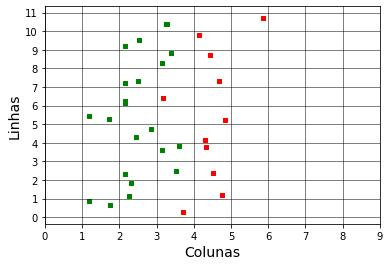

In [13]:
# Função que retorna um número aleatório entre 0.15 e 0.85. Esse valor será utilizado como incremento para as
# coordenadas dos pontos que serão impressos no infográfico dos caminhos.
def valorAleatorio():
    acrescimo = rd.random()
    if acrescimo > 0.85:
        acrescimo = 0.85
    elif acrescimo < 0.15:
        acrescimo = 0.15
    return acrescimo

# Função que imprime todos o caminho em qualquer par de um submapa do mapeamento 
# do tabuleiro
def imprimeCaminho(par, tamanho, cor):
    coord_lin = []
    coord_col = []
    caminho = par[0]  # Caminho no mapeamento
    for posicao in caminho:  # Para cada posição ocupada no tabuleiro
        coord_lin.append(posicao[0] + valorAleatorio())  # Grava linha + acréscimo em coord_lin
        coord_col.append(posicao[1] + valorAleatorio())  # Grava coluna + acréscimo em coord_col
    plt.scatter(coord_col, coord_lin, color=cor, marker='s', s=tamanho)  # Imprime os pontos no gráfico

# Configurações do infográfico.
def configGraficos():
    plt.xlabel("Colunas", fontsize=14)
    plt.ylabel("Linhas", fontsize=14)
    plt.xticks(range(0, 10))
    plt.yticks(range(0, 12))
    plt.grid(color='black', linestyle='solid', linewidth=0.5)
    plt.show()  # Mostra o gráfico

sub_mapa_maior_proba = [] # Lista que recebe os caminhos de maior probabilidade
for item in mapa_tabuleiro: # "item" é guardado na lista quando sua probabilidade 
    if item[1] == maior_proba: # é a maior.
        sub_mapa_maior_proba.append(item)
        
sub_mapa_menor_proba = [] # Lista que recebe os caminhos de menor probabilidade
for item in mapa_tabuleiro: # "item" é guardado na lista quando sua probabilidade 
    if item[1] == menor_proba: # é a menor.
        sub_mapa_menor_proba.append(item)

# Percorre a lista de caminhos de maior probabilidade
for item in sub_mapa_maior_proba:
    imprimeCaminho(item, 20, 'green')
    
# Percorre a lista de caminhos de menor probabilidade
for item in sub_mapa_menor_proba:
    imprimeCaminho(item, 20, 'red')

print('\tCaminhos mais prováveis: em verde')
print('\tCaminhos menos prováveis: em vermelho.')

configGraficos()

Na célula abaixo, preenchemos uma lista com todos os caminhos que possuem as 2000 maiores probabilidades. Preenchemos, também uma lista com todos os caminhos que possuem as 2000 menores probabilidades.

Depois, imprimimos todos estes caminhos em um infográfico com o formato do tabuleiro do Zigue-Zague, colocando os caminhos mais prováveis de ocorrer em verde e os menos prováveis em vermelho.

A escolha do número 2000 não foi realizada a partir de qualquer critério especial. O objetivo é visualizar uma certa quantidade de caminhos mais prováveis e, também, uma certa quantidade de caminhos menos prováveis, para que possamos inferir qual região do tabuleiro seria mais conveniente para obter uma vitória no jogo.

Assim, se trocarmos 2000 por qualquer outro número inteiro entre 1 e 11 538, que é o resultado de metade de *len(distintas_probas)* menos um, poderemos observar mais caminhos com maior e também com menor probabilidades de ocorrer. Os problemas imediatos em aumentar muito esse valor, é que o código ficará extremamente lento e certamente a visualização resultante ficará "poluída", tornando difícil interpretar a impressão obtida.
<a name="infografico_1"></a>

	Caminhos mais prováveis: em verde
	Caminhos menos prováveis: em vermelho.


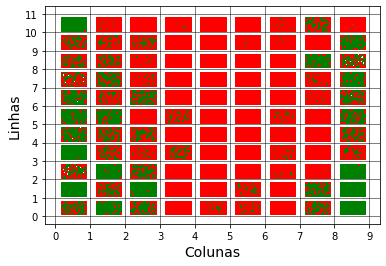

In [14]:
# Função que recebe o mapa do tabuleiro (fornecido pela função mapaTabuleiro()), a lista
# de distintas probabilidades (fornecida pelo método distintasProbas()), o menor valor de
# probabilidade desejado, o maior valor desejado e retorna uma lista com todos os caminhos na
# faixa de probabilidades entre o menor e o maior valor inseridos.
def mapaFaixaProbas(mapa_tabuleiro, distintas_probas, indice_min_proba, indice_max_proba):
    distintas_probas.sort()
    inf = distintas_probas[indice_min_proba]
    sup = distintas_probas[indice_max_proba]
    caminhos = []  # Lista que recebe os caminhos na faixa de probabilidades escolhida.
    for item in mapa_tabuleiro:  # "item" é guardado na lista quando sua probabilidade ...
        if inf <= item[1] <= sup:  # ... está entre a menor e a maior.
            caminhos.append(item)
    return caminhos

submapa_inferior = mapaFaixaProbas(mapa_tabuleiro, distintas_probas, 0, 2000)
submapa_superior = mapaFaixaProbas(mapa_tabuleiro, distintas_probas, 21076, 23076)

# Percorre a lista de caminhos de maior probabilidade e imprime cada um.
for caminho in submapa_superior:
    imprimeCaminho(caminho, 1, 'green')

# Percorre a lista de caminhos de menor probabilidade e imprime cada um.
for caminho in submapa_inferior:
    imprimeCaminho(caminho, 1, 'red')

print('\tCaminhos mais prováveis: em verde')
print('\tCaminhos menos prováveis: em vermelho.')

configGraficos()

A visualização acima parece sugerir algo. Visualmente, os caminhos de mais alta probabilidade (em verde), estão concentrados em torno da segunda e terceira colunas, enquanto os caminhos de mais baixa probabilidade (em vermelho), estão concentrados em torno da coluna cinco. Portanto, é razoável inferir que para aumentar as chances de vitória, quem joga deve manter-se próximo às colunas dois e três. Em outras palavras, para buscar a vitória no jogo, o ideal seria manter-se próximo às colunas dois e três, para que sempre existam casas de mais alta probabilidade acima ou nas diagonais.

Entretanto, esse princípio ainda não deve ser concluído, pois na visualização acima, imprimimos os pontos que indicam as casas dos caminhos mantendo uma distância mínima de 15 \% das bordas (tanto das bordas horizontais quanto das verticais). Além disso, imprimimos primeiro os pontos em verde e por último os pontos em vermelho. Dessa forma, talvez tenhamos sobreposição de pontos verdes e vermelhos que não podem ser identificadas, fazendo com que uma simples observação a olho nú seja um critério pouco confiável.

Na célula abaixo, invertemos a ordem de impressão e efetuamos a contagem dos caminhos impressos em cada categoria, para analisar o que eventualmente esteja acontecendo.

In [ ]:
# Percorre a lista de caminhos de menor probabilidade, imprime cada um e conta.
total_vermelho = 0
for caminho in submapa_inferior:
    imprimeCaminho(caminho, 1, 'red')
    total_vermelho += 1
    
# Percorre a lista de caminhos de maior probabilidade, imprime cada um e conta.
total_verde = 0
for caminho in submapa_superior:
    imprimeCaminho(caminho, 1, 'green')
    total_verde += 1

print(f'\tCaminhos mais prováveis: em verde ({total_verde} caminhos)')
print(f'\tCaminhos menos prováveis: em vermelho ({total_vermelho} caminhos)')

configGraficos()

Uma comparação entre o novo infográfico e o anterior nos mostra que a sobreposição é realmente um fator que deve ser levado em consideração. Na nova visualização, todo o tabuleiro parece igualmente promissor, exceto por algumas poucas casas que apresentam mais pontos vermelhos. Em particular, contamos o total de caminhos em verde e em vermelho, concluíndo que a sobreposição é de fato uma questão relevante, pois há uma diferença significativa no número de caminhos impressos: 27624 caminhos mais prováveis e 7008 caminhos menos prováveis.

As observações acima, explicitam a necessidade de eliminar ambiguidades. As visualizações geradas não podem depender de uma eventual ordem de impressão escolhida e a quantidade de caminhos para cada faixa de probabilidades deve ser a mesma.

Na célula abaixo, apresentamos uma solução, como detalhado a seguir.

Dado um mapeamento do tabuleiro (por meio da função **mapaTabuleiro**), a função **subMapaAleatorio** receberá qualquer *submapa* (gerado pela função **mapaFaixaProbas**), um valor aleatório e retornará uma lista com uma quantidade de caminhos escolhidos aleatoriamente no submapa igual ao valor dado.

A função **total** receberá dois submapas e retornará a quantidade de elementos daquele que possuir menor número de elementos, que será utilizado como parâmetro na função **subMapaAleatorio** e, assim, resolverá o problema (levantado anteriormente) das diferentes quantidades de caminhos de mais alta e mais baixa probabilidades.

Deve-se notar que a implementação da função **subMapaAleatorio** fará uso do método *sample* da biblioteca *random*. O método *sample* "escolherá" aleatoriamente no submapa (definido como parâmetro) uma certa quantidade de caminhos, de acordo com o que especificarmos (na prática será o valor calculado pela função **total**).

A função **mapaRazoes** receberá um submapa (aleatório) com as menores probabilidades), um submapa (aleatório) com as maiores probabilidades e retornará um novo mapeamento do tabuleiro, onde cada casa será representada pela razão entre o números de caminhos do submapa de maiores probabilidades e o número de caminhos do submapa de menores probabilidades que passam pela mesma. Assim, ao invés de imprimir cada um dos caminhos, será executado um cálculo. Por exemplo, se por uma determinada casa passam 20 caminhos da faixa das mais altas probabilidades e 2 caminhos da faixa das mais baixas, então a casa será representada pela razão 20/2, isto é, pelo número 10; se em uma outra casa o número de caminhos da faixa mais alta for 5 e na faixa de mais baixas probabilidades for 10, então a casa será representada pela razão 2/10, isto é, pelo número 1/5.

Depois, de criado um mapa de razões, como descrito no parágrafo anterior, basta imprimir um único retângulo colorido por casa do tabuleiro, criando um tipo de mapa de calor, onde cores mais escuras representam maiores razões (há mais caminhos da faixa de altas probabilidades do que da faixa de baixas probabilidades), enquanto cores mais claras representam menores razões (há menos caminhos da faixa de altas probabilidades do que da faixa de baixas probabilidades).

A aplicação da função **subMapaAleatorio** criará um problema de representatividade. Ilustremos tal problema com a situação anterior, onde tínhamos 27624 caminhos mais prováveis (guardados na lista submapa_superior) e suponhamos que nossa função retorne 2000 caminhos aleatoriamente; pergunta-se: as informações que serão geradas pelos 2000 caminhos representam o comportamento dos 27624 caminhos? Em outras palavras, a distribuição dos 2000 caminhos pelo tabuleiro representa o comportamento geral? Não há garantias e, para lidar com esse problema, usaremos estatística básica.

Notemos que a função **mapaRazoes** receberá como parâmetros exatamente os submapas aleatorios inferiores e superiores, de modo que se os caminhos escolhidos aleatoriamente não forem representativos, então as razões também não representarão o comportamento no tabuleiro. A solução aqui apresentada será, portanto, a geração de vários submapas aleatórios e, numa lista de mapas de razões, calcular as médias (que serão dadas pela função **mediasRazoes**) destes mapas para cada casa do tabuleiro e calcular o quanto as razões se distanciam da média em cada casa, sendo que tal distanciamento da média será calculado pela função **desviosRazoes**.

Por último, serão calculados com a função **mediasComDesvio** um tabuleiro de razões (que representa o limite inferior (por casa) dos tabuleiros guardados na lista de mapas de razões) e um tabuleiro que representa o limite superior (por casa) 

In [15]:
# Função que percorre uma lista de caminhos em uma faixa de probabilidades 
# e retorna uma lista contendo uma quantidade aleatória de caminhos.
def subMapaAleatorio(submapa, quantidade):
    lista = []
    if len(submapa) >= quantidade:
        for caminho in rd.sample(submapa, quantidade):
            lista.append(caminho)
    return lista

# Função que recebe dois submapas e retorna o número de elementos do menor.
def total(submapa_inferior, submapa_superior):
    linf = len(submapa_inferior)
    lsup = len(submapa_superior)
    if linf < lsup:
        return linf
    return lsup

# Percorre mapa das maiores probabilidades contando cada casa, faz o mesmo com as mais baixas
# e retorna um novo mapeamento com a razão entre o total de mais altas pelo total de mais baixas.
def mapaRazoes(submapa_inferior, submapa_superior):
    tab_razoes = [
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 1 - Início do jogo
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 2
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 3
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 4
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 5
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 6
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 7
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 8
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 9
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 10
        [[1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1]],  # linha 11 - Fim do jogo
    ]
    # Tabuleiro gerado com comprehension list (a linha abaixo substitui a representação anterior):
    # tab_razoes = [[[1, 1] for _ in range(9)] for _ in range(11)] 
    razoes = [
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 1 - Início do jogo
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 2
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 3
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 4
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 5
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 6
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 7
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 8
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 9
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 10
        [1, 1, 1, 1, 1, 1, 1, 1, 1],  # linha 11 - Fim do jogo
    ]
    # Tabuleiro gerado com comprehension list:
    # razoes = [[1 for _ in range(9)] for _ in range(11)] # Esta linha substitui a representação anterior.
    for caminho_prob in submapa_inferior:  # Para cada par (caminho, probabilidade_do_caminho) no mapa inferior.
        caminho = caminho_prob[0]
        for casa in caminho:
            lin = casa[0]
            col = casa[1]
            tab_razoes[lin][col][1] += 1
    for caminho_prob in submapa_superior:  # Para cada par (caminho, probabilidade_do_caminho) no mapa superior.
        caminho = caminho_prob[0]
        for casa in caminho:
            lin = casa[0]
            col = casa[1]
            tab_razoes[lin][col][0] += 1
    for l in range(11):
        for c in range(9):
            razoes[l][c] = tab_razoes[l][c][0] / tab_razoes[l][c][1]
    return razoes

# Método que recebe uma lista contendo mapas de razões e retorna um tabuleiro contendo
# as médias das razões dos tabuleiros inseridos para cada casa.
def mediasRazoes(lista_mapas_razoes):
    tam = len(lista_mapas_razoes)
    medias = [[0 for _ in range(9)] for _ in range(11)]  # Tabuleiro inicializado com 0's.
    for mapa_razoes in lista_mapas_razoes:
        for i in range(11):
            for j in range(9):
                medias[i][j] += mapa_razoes[i][j]
    for i in range(11):
        for j in range(9):
            medias[i][j] = medias[i][j] / tam
    return medias

# Método que recebe uma lista contendo mapas de razões, o mapa das médias
# da lista e retorna um tabuleiro contendo os desvios das médias das razões para cada casa.
def desviosRazoes(lista_mapas_razoes, medias):
    tam = len(lista_mapas_razoes)
    desvios = [[0 for _ in range(9)] for _ in range(11)]  # Tabuleiro inicializado com 0's.
    for mapa_razoes in lista_mapas_razoes:
        for i in range(11):
            for j in range(9):
                desvios[i][j] += abs(mapa_razoes[i][j] - medias[i][j])
    for i in range(11):
        for j in range(9):
            desvios[i][j] = desvios[i][j] / tam
    return desvios

# Função que recebe uma lista contendo as médias das razões, o mapa dos desvios das médias
# e retorna um tabuleiro contendo as médias com os desvios adicionados ou subtraídos para cada casa,
# dependendo do parâmetro sup ser True ou False, respectivamente.
def mediasComDesvio(medias, desvios, sup):
    medias_desvio = [[0 for _ in range(9)] for _ in range(11)]  # Tabuleiro inicializado com 0's.
    if sup: # sup vale True.
        for i in range(11):
            for j in range(9):
                medias_desvio[i][j] = medias[i][j] + desvios[i][j]
    else: # sup vale False.
        for i in range(11):
            for j in range(9):
                medias_desvio[i][j] = medias[i][j] - desvios[i][j]
    return medias_desvio

# Verifica qual submapa possui menor número de elementos para imprimir a mesma quantidade.
TOTAL = total(submapa_inferior, submapa_superior)

# Gera diversos mapas de razões do tabuleiro e guarda na lista de mapas de razões.
lista_mapas_razoes = []
for _ in range(2000):
    submapa_aleatorio_superior = subMapaAleatorio(submapa_superior, TOTAL)
    submapa_aleatorio_inferior = subMapaAleatorio(submapa_inferior, TOTAL)
    razoes = mapaRazoes(submapa_aleatorio_inferior, submapa_aleatorio_superior)
    lista_mapas_razoes.append(razoes)

# Mapa com as médias (por casa) das razões na lista de mapas de razões.
medias = mediasRazoes(lista_mapas_razoes)

# Mapa com os desvios (por casa) das médias das razões na lista de mapas de razões.
desvios = desviosRazoes(lista_mapas_razoes, medias)

# Médias menos os desvios (indicado pelo False):
medias_inf = mediasComDesvio(medias, desvios, False) 

# Médias mais os desvios (indicado pelo True):
medias_sup = mediasComDesvio(medias, desvios, True)

print(f'Médias inferiores (primeira linha):\n{medias_inf[0]}\n')

print(f'Médias (primeira linha):\n{medias[0]}\n')

print(f'Médias superiores (primeira linha):\n{medias_sup[0]}')

Médias inferiores (primeira linha):
[3.4129720649350657, 142.2206315714285, 21.91863228985506, 0.06940130760700809, 2.6801447006802754, 2.1335649815498168, 0.03803262251462, 9.81527588888891, 651.447409]

Médias (primeira linha):
[3.562376623376624, 144.1221785714285, 22.26649275362318, 0.07208505211798615, 2.741886054421772, 2.1933856088560897, 0.041307309941520584, 10.05691666666669, 668.3115]

Médias superiores (primeira linha):
[3.7117811818181825, 146.02372557142849, 22.614353217391297, 0.0747687966289642, 2.8036274081632686, 2.2532062361623626, 0.04458199736842117, 10.298557444444468, 685.175591]


Na célula anterior, geramos três mapas de razões: **medias**, **medias_inf** e **medias_sup**. Agora, vamos gerar uma visualização para cada um destes mapas, com o objetivo de identificar se há uma região do tabuleiro onde as probabilidades de avançar são maiores.

Caso existam diferenças visuais significativas entre os três mapas impressos, então pode-se afirmar que há falta de representatividade dos caminhos escolhidos aleatoriamente para representar o tabuleiro. Caso contrário, se todas as visualizações indicarem o mesmo comportamento geral, então a tarefa de descoberta de uma estratégia vencedora estará concluída.

Para gerar as visualizações, usaremos o método *pcolor* do pacote *pyplot* (da biblioteca *matplotlib*), que recebe uma *array* numérico e retorna um tipo de mapa de calor. Em nossa impressão, quanto maior for a razão, mais escura será a representação gráfica da casa.

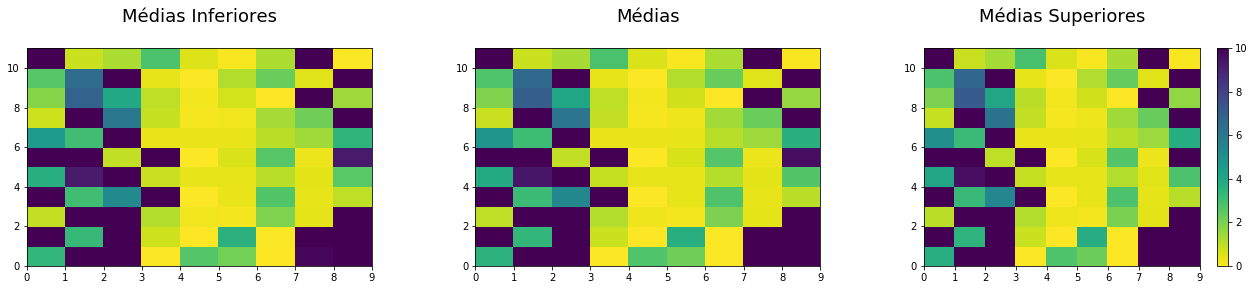

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1) # Infográfico das médias inferiores.
ax2 = fig.add_subplot(1, 3, 2) # Infográfico das médias.
ax3 = fig.add_subplot(1, 3, 3) # Infográfico das médias superiores.

VMAX = 10 # Valor máximo para a normalização.

# Coloração do infográfico das médias inferiores:
im = ax1.pcolor(medias_inf, cmap="viridis_r", vmin=0, vmax=VMAX)
ax1.set_title('Médias Inferiores\n', fontsize=18)

# Coloração do infográfico das médias:
ax2.pcolor(medias, cmap="viridis_r", vmin=0, vmax=VMAX)
ax2.set_title('Médias\n', fontsize=18)

# Coloração do infográfico das médias superiores:
ax3.pcolor(medias_sup, cmap="viridis_r", vmin=0, vmax=VMAX)
ax3.set_title('Médias Superiores\n', fontsize=18)

plt.colorbar(im) # Escala de cores.

plt.subplots_adjust(right=3, wspace=0.3)

plt.show()

Uma análise atenta dos três infográficos da célula anterior mostram que não há divergencias significativas entre os mesmos, ou seja, comparando as respectivas casas, não é possível notar difenças significativas nas cores e, assim, concluímos que a dispersão em torno da média é pequena. Portanto, o tabuleiro das médias representa o comportamento geral das razões entre os caminhos de mais alta probabilidade e os de mais baixa probabilidade que passam por cada casa.

Assim, a representação das razões obtida confirma que o primeiro infográfico (<a href="#infografico_1">infográfico 1</a>), gerado por impressão dos pontos, representava a distribuição dos caminhos pelo tabuleiro, de acordo com as respectivas probabilidades. De fato, a nova visualização elimina o problema das sobreposições e, sendo visualmente semelhante ao primeiro infográfico, permite concluir que aquela análise estava correta.

## Descrição de Uma Estratégia Vencedora

> No tabuleiro, as três colunas da esquerda (1, 2 e 3) constituem a região com maior probabilidade de avançar em um jogo; as três colunas centrais (4, 5 e 6) constituem a região com menor probabilidade; as três colunas da direita (7, 8 e 9) constituem uma região intermediária.
>
> Enfim, jogar pela esquerda potencializa as chances de vencer no Zigue-Zague; a segunda melhor opção é avançar pela direita; a pior região é a central.

A conclusão acima pode ser melhor confirmada de duas formas: calculando a média das probabilidades das casas do tabuleiro por região (esquerda, centro e direita) e simulando uma série de jogadas em tais regiões.

In [ ]:
media_esquerda = []
media_centro = []
media_direita = []
for linha in tab_proba:
    for coluna in range(0, 3):
        media_esquerda.append(linha[coluna][3])
    for coluna in range(3, 6):
        media_centro.append(linha[coluna][3])
    for coluna in range(6, 9):
        media_direita.append(linha[coluna][3])
        
media_esquerda = sum(media_esquerda) / 33 # 33 é o número de casas em cada região.
media_centro = sum(media_centro) / 33
media_direita = sum(media_direita) / 33

print(f'Média das probabilidades na região esquerda: {round(media_esquerda, 4)}')
print(f'Média das probabilidades na região central: {round(media_centro, 4)}')
print(f'Média das probabilidades na região direita: {round(media_direita, 4)}')

Analisando os resultados obtidos na célula anterior, a conclusão é a mesma: a região esquerda é a que possui as casas com maior média de probababilidades, a região direita possui a segunda maior média e a região central a menor.

Entretanto, apesar de confirmar aquilo que  observamos visualmente, deve-se salientar a fragilidade em utilizar tais dados como argumento. De fato, temos diferenças na ordem dos milésimos ou dos décimos de milésimos, sendo estas muito pequenas para isoladamente sugerir uma estratégia vencedora. 

Na célula abaixo, imprimimos um mapa de calor do tabuleiro. No mapa, quanto mais escura a cor, maior a probabilidade de ocorrência do número contido na casa.

In [ ]:
probas = [[0 for _ in range(9)] for _ in range(11)]
for i in range(11):
    for j in range(9):
        probas[i][j] = tab_proba[i][j][3]
plt.pcolor(probas, cmap="viridis_r", vmin=0, vmax=0.1)
plt.title('Probabilidades no Tabuleiro\n', fontsize=14)
plt.show()

Observa-se que o destaque, em cor mais escura, para as casas com maiores chances de ocorrência pouco ajudam na identificação de uma estratégia vencedora, isto é, nenhuma região do tabuleiro fica evidenciada, corroborando a percepção que temos quando simplesmente analisamos as médias das probabilidades em cada uma das três regiões destacadas do tabuleiro.

Para concluir a argumentação sobre a estratégia vencedora apresentada no início desta seção, resta a realização de simulações de jogos, de acordo com a região do tabuleiro.

Portanto, subdvidiremos o tabuleiro em três regiões: esquerda, centro e direita, como descrito anteriormente. Para tanto, a função **jogar()** recebe como parâmetro o tabuleiro (*tab_esquerda*, *tab_centro* ou *tab_direita*) e uma variável booleana *imprimir* (o valor *True* indica que os valores de cada jogada serão impressos); o retorno do método é o número de jogadas onde não existe possibilidade de avançar.

Em nossa simulação, verificamos a região que o jogo ocorre com menos paradas, de modo que podemos confirmar ou refutar a percepção visual obtida anteriormente.

In [ ]:
# Função que recebe um tabuleiro reduzido (com 3 colunas) e testa uma jogada, retornando a quantidade de jogadas
# onde não foi possível avançar por falta de opção. O parâmetro imprimir, imprime a sequência de jogadas 
# quando vale True e, caso contrário, apenas retorna a quantidade de jogadas.
def jogar(tabuleiro, configuracoes_dados, imprimir):
    passou = 0 # Contador de jogadas sem avançar.
    coluna = rd.randint(0,2) # Escolha aleatória de coluna do tabuleiro para começar.
    pos_inicial = (0, coluna) # Posição inicial no tabuleiro, iniciando na 1ª linha e em coluna aleatória.

    i = 0 # Índice para a primeira linha do tabuleiro, ou seja, posição zero.

    while i < len(tabuleiro) - 1:    
        # O parâmetro "configuracoes" fornece todas as possíveis configurações para três dados distintos.
        jogada = rd.sample(configuracoes_dados, 1) # Lança os três dados.

        expressoes = resultadosExpressoes(jogada) # Lista de todas as possíveis expressões numéricas para a "jogada" acima.

        proxima_jogada = listaProximaJogada(pos_inicial[1], 2)

        possibilidades = [] # Lista que guarda as possíveis casas para avançar, i. e., as casas da linha seguinte
        # que possuem resultados na lista "expressoes".

        for posicao in proxima_jogada:
            for expressao in expressoes:
                if expressao == tabuleiro[i + 1][posicao]:
                    possibilidades.append(expressao)
                    
        if imprimir:
            print(f'Posição inicial: {pos_inicial}')
            print(f'Jogada: {jogada}')
            print(f'Expressões: {expressoes}')
            print(f'Lista da próxima jogada: {proxima_jogada}')
            print(f'Próxima linha: {tabuleiro[i + 1]}')

        if possibilidades: # Se há possibilidades de avançar, escolhe aleatoriamente a próxima casa.
            escolha = rd.choice(possibilidades) # Escolhe um número na próxima linha para avançar.
            coluna = tabuleiro[i + 1].index(escolha) # Verifica, na próxima linha, qual é a coluna referente ao 
            # número escolhido para avançar.
            i += 1 # Avança para a próxima linha.
        else:
            passou += 1
            
        if imprimir:
            print(f'Possibilidades: {possibilidades}')
            print(f'Jogadas sem avançar: {passou}\n')
            
        pos_inicial = (i, coluna) # Avança para a próxima linha, na coluna escolhida acima.
    
    return passou

Na célula acima, temos:

**Posição inicial** - É um par ordenado, onde a primeira entrada indica a linha (começando com zero e terminando em 9) e a segunda entrada a coluna (começando aleatoriamente com 0, 1 ou 2 e avançando de acordo com as possiblidades do jogo, sempre assumindo 0, 1 ou 2).

**Jogada** - Recebe uma terna contendo os sorteios dos dados.

**Expressões** - Lista de todos os possíveis resultados de expressões que podem ser formadas com a terna sorteada (em Jogada).

**Lista da próxima jogada** - Indica as colunas onde as regras do jogo permitem avançar: $[0,  1]$, $[0, 1, 2]$ ou $[1, 2]$.

**Próxima linha** - Todos os valores da próxima linha (apenas para usar como referência).

**Possibilidades** - Os valores das casas onde é possível avançar, de acordo com as regras do jogo e com os valores sorteados (nos dados).

**Jogadas sem avançar** - Indica o total de vezes, até o momento no jogo, onde a lista de possibilidades estava vazia e, portanto, não havia como avançar.

Na célula abaixo, simulamos um certo número de vezes as jogadas pela esquerda, centro e direita do tabuleiro. A função **simulacao()** recebe como parâmetro o número de testes que desejamos realizar e retorna uma tupla com a média das simulações pela esquerda, centro e direita, respectivamente.

In [ ]:
# Teste para visualizar (indicado pelo True) uma sequência de jogadas por uma região 
# do tabuleiro de teste, usado no início do texto.
# Modelo do tabuleiro de teste:
tab_teste = [
    [7, 5, 6], # linha 1 = tab[0] - Início do jogo
    [2, 8, 1], # linha 2 = tab[1]
    [7, 3, 2], # linha 3 = tab[2]
    [5, 8, 7], # linha 4 = tab[3] - Fim do jogo
]
print(f'\nTotal de jogadas sem avançar: {jogar(tab_teste, configuracoes_dados, True)}')

No final, imprimimos os resultados dos testes para 2, 4, 6, 8, 10, 12, 14 e 16 milhões de experimentos. Usamos as bibliotecas *numpy* e *pandas* para gerar a tabela com os dados dos experimentos.

In [ ]:
# Modelo do tabuleiro:
tab = [
    [7, 5, 6, 9, 4,  2, 8, 1, 3],  # linha 1  = tab[0]  - Início do jogo
    [2, 8, 1, 8, 10, 7, 9, 4, 5],  # linha 2  = tab[1]
    [7, 3, 2, 1, 5,  4, 5, 7, 3],  # linha 3  = tab[2]
    [5, 8, 7, 2, 8,  7, 6, 9, 8],  # linha 4  = tab[3]
    [7, 3, 2, 1, 5,  4, 5, 7, 3],  # linha 5  = tab[4]
    [2, 4, 8, 5, 9,  7, 6, 8, 5],  # linha 6  = tab[5]
    [8, 7, 3, 6, 4,  1, 2, 5, 1],  # linha 7  = tab[6]
    [6, 2, 5, 7, 8,  7, 6, 4, 3],  # linha 8  = tab[7]
    [8, 7, 6, 3, 5,  4, 9, 2, 7],  # linha 9  = tab[8]
    [5, 4, 3, 8, 9,  1, 2, 5, 4],  # linha 10 = tab[9]
    [2, 9, 7, 4, 6,  8, 7, 5, 9],  # linha 11 = tab[10] - Fim do jogo
]

tab_esquerda = [
        [7, 5, 6],  # linha 1  = tab[0]  - Início do jogo
        [2, 8, 1],  # linha 2  = tab[1]
        [7, 3, 2],  # linha 3  = tab[2]
        [5, 8, 7],  # linha 4  = tab[3]
        [7, 3, 2],  # linha 5  = tab[4]
        [2, 4, 8],  # linha 6  = tab[5]
        [8, 7, 3],  # linha 7  = tab[6]
        [6, 2, 5],  # linha 8  = tab[7]
        [8, 7, 6],  # linha 9  = tab[8]
        [5, 4, 3],  # linha 10 = tab[9]
        [2, 9, 7],  # linha 11 = tab[10] - Fim do jogo
    ]

tab_centro = [
        [9, 4,  2],  # linha 1  = tab[0]  - Início do jogo
        [8, 10, 7],  # linha 2  = tab[1]
        [1, 5,  4],  # linha 3  = tab[2]
        [2, 8,  7],  # linha 4  = tab[3]
        [1, 5,  4],  # linha 5  = tab[4]
        [5, 9,  7],  # linha 6  = tab[5]
        [6, 4,  1],  # linha 7  = tab[6]
        [7, 8,  7],  # linha 8  = tab[7]
        [3, 5,  4],  # linha 9  = tab[8]
        [8, 9,  1],  # linha 10 = tab[9]
        [4, 6,  8],  # linha 11 = tab[10] - Fim do jogo
    ]

tab_direita = [
        [8, 1, 3],  # linha 1  = tab[0]  - Início do jogo
        [9, 4, 5],  # linha 2  = tab[1]
        [5, 7, 3],  # linha 3  = tab[2]
        [6, 9, 8],  # linha 4  = tab[3]
        [5, 7, 3],  # linha 5  = tab[4]
        [6, 8, 5],  # linha 6  = tab[5]
        [2, 5, 1],  # linha 7  = tab[6]
        [6, 4, 3],  # linha 8  = tab[7]
        [9, 2, 7],  # linha 9  = tab[8]
        [2, 5, 4],  # linha 10 = tab[9]
        [7, 5, 9],  # linha 11 = tab[10] - Fim do jogo
    ]

def simulacao(numero_testes):
    esquerda = []
    centro = []
    direita = []
    for _ in range(numero_testes):
        esquerda.append(jogar(tab_esquerda, configuracoes_dados, False))
        centro.append(jogar(tab_centro, configuracoes_dados, False))
        direita.append(jogar(tab_direita, configuracoes_dados, False))
    esquerda = sum(esquerda) / numero_testes
    centro = sum(centro) / numero_testes
    direita = sum(direita) / numero_testes
    return (esquerda, centro, direita)

In [ ]:
import numpy as np

In [ ]:
dados2mi = np.array(simulacao(2000000))
dados2mi

In [ ]:
dados4mi = (dados2mi + np.array(simulacao(2000000)))/2
dados4mi

In [ ]:
dados6mi = (dados4mi + np.array(simulacao(2000000)))/2
dados6mi

In [ ]:
dados8mi = (dados6mi + np.array(simulacao(2000000)))/2
dados8mi

In [ ]:
dados10mi = (dados8mi + np.array(simulacao(2000000)))/2
dados10mi

In [ ]:
dados12mi = (dados10mi + np.array(simulacao(2000000)))/2
dados12mi

In [ ]:
dados14mi = (dados12mi + np.array(simulacao(2000000)))/2
dados14mi

In [ ]:
dados16mi = (dados14mi + np.array(simulacao(2000000)))/2
dados16mi

In [ ]:
import pandas as pd

In [ ]:
dados = [dados2mi, dados4mi, dados6mi, dados8mi, 
         dados10mi, dados12mi, dados14mi, dados16mi]
df = pd.DataFrame(dados, 
             index=['2 milhões', '4 milhões', '6 milhões', '8 milhões', 
                    '10 milhões', '12 milhões', '14 milhões', '16 milhões'], 
             columns=['Esquerda', 'Centro', 'Direita'])
df

Note na tabela acima (DataFrame da biblioteca Pandas) que as linhas indicam os números de simulações realizadas, enquanto as colunas mostram os valores obtidos em cada região do tabuleiro.

Para assimilar melhor as informações do DataFrame, calculamos na célula abaixo a média por região do número de vezes sem avançar para cada simulação.

In [ ]:
df.mean()

De modo geral, os valores acima confirmam nossas expectativas sobre as regiões.

Abaixo, colocamos as informações do DataFrame em percentual com relação a coluna da esquerda, ou seja, observando que a média de vezes sem avançar é menor na coluna da esquerda, podemos verificar o quanto a mais (percentual) as colunas do centro e da direita precisam para percorrer o tabuleiro.

In [ ]:
# Percentual a mais do centro com relação a esquerda:
df['% Centro'] = 100 * (df['Centro'] - df['Esquerda']) / df['Esquerda']

# Percentual a mais da direita com relação a esquerda:
df['% Direita'] = 100 * (df['Direita'] - df['Esquerda']) / df['Esquerda']

# Remove as colunas Esquerda, Centro e Direita da nova visualização:
percentual = df.drop(['Esquerda', 'Centro', 'Direita'], axis=1)

percentual

Calculamos abaixo a média para as colunas *% Centro* e *% Direita*.

In [ ]:
percentual.mean()

Da célula acima, concluímos que percorrer fora da região esquerda do tabuleiro demanda um número significativo de jogadas a mais.

Portanto, encerramos nossa análise, confirmando a estratégia vencedora anunciada no início da seção. 

> **Síntese**
>
> O primeiro lance determina a faixa do tabuleiro onde a pessoa iniciará e, portanto, esse deve ser o critério escolhido para potencializar as chances de vitória. Iniciar por uma das três colunas da direita é bom, mas por uma das três colunas da esquerda é ainda melhor.

## Considerações Finais

Construímos, formalmente, o modelo probabilístico proposto para o jogo Zigue-Zague. Em nossa construção, decidimos tomar como espaço amostral o conjunto formado por todas as distintas expressões numéricas formadas com as ternas do experimento aleatório, ou seja, dos possíveis valores obtidos no lançamento de três dados. 

A escolha por representar os pontos do espaço amostral por expressões numéricas não é a única possível. Poderíamos, por exemplo, ter tomado os distintos resultados das expressões numéricas e apenas contar o total de expressões que geram os mesmos resultados, para futuramente atribuirmos probabilidade aos eventos simples da $\sigma-\mbox{Álgebra}$ obtida.

Por um lado, outra escolha de espaço amostral poderia reduzir as casas decimais das probabilidades associadas, mas traria a desvantagem de não representar os acontecimentos do jogo de uma forma clara. Em outras palavras, utilizar expressões numéricas como pontos do espaço amostral, sinaliza todo o processo, que envolve lançar os três dados, montar uma expressão numérica, calcular tal expressão e efetuar a jogada.

Outra consequência de nossa escolha para o espaço amostral, foi a obtenção de mais elementos para o espaço amostral que elementos do experimento aleatório. Não vimos nisso um problema, exatamente pelo argumento anterior, sobre a representatividade mais clara dos acontecimentos do jogo.

A modelagem teórica dos caminhos utilizando variáveis aleatórias e vetores aleatórios, foi bem sucedida, mas na prática, quando calculamos as probabilidades dos caminhos, os valores obtidos são aproximadamente da ordem de $10^{-15}$. Certamente teremos que trabalhar com alguma mudança de escala para mapear graficamente os caminhos com as respectivas probabilidades, pois para números de ordem muito baixa podem ocorrer limitações de processamento computacional.

Optamos por fazer um mapeamento completo dos caminhos para a próxima etapa, onde buscaremos uma estratégia vencedora para o Zigue-Zague. Por mapeamento completo, queremos dizer que não nos limitados apenas ao registro dos valores que compõe cada caminho, mas também das posições (par linha e coluna) de cada valor no tabuleiro, do próprio valor, a probabilidade do valor (como evento simples) e a probabilidade do próprio caminho. Essa particular escolha parece, inicialmente, trazer mais complexidade, mas esperamos que na próxima etapa o mapeamento sirva como um resumo de tudo que obtivemos no processo.

A segunda maior meta desta etapa, depois de estabelecer formalmente o modelo probabilístico, foi a execução da parte computacional. De modo geral, a linguagem *Python* executou todos os códigos rapidamente, mostrando ser uma escolha realmente viável para o trabalho proposto. A <a href="#distintas_probas">célula</a> para o cálculo dos caminhos com distintas probabilidades demorou aproximadamente $15$ segundos para o processamento, sendo que o tempo foi verificado com a função mágica *%%time* do *iPython* (interpretador interativo para várias linguagens de programação, mas especialmente focado em *Python*). As demais células não superaram o tempo de $2$ segundos para a execução.

As biblioteca *permutations* e *product* do pacote *itertools* facilitou bastante o processo de mapeamento dos resultados do experimento aleatório, reduzindo significativamente a quantidade de linhas de código e tornando o entendimento do mesmo mais claro.

Os códigos subsequentes usaram apenas as estruturas básicas da linguagem *Python*, sem bibliotecas externas. Obtivemos $339\,699$ caminhos distintos no tabuleiro, sendo que destes apenas $23\,077$ possuem probabilidades com valores distintos. Esse resultado revela, em um primeiro momento, que os caminhos não são equiprováveis. Ou seja, percorrer certos caminhos pode aumentar as chances de vitória, como era esperado.

Por outro lado, uma análise mais detida revela, de forma imediata, que a ordem de grandeza muito baixa das probabilidades dos caminhos pode ou dificultar a visualização dos resultados ou tornar insignificante a obtenção de uma estratégia vencedora. 

De qualquer forma, essa pergunta somente poderá ser respondida após uma análise estatística básica, envolvendo os valores mínimo e máximo, média, variância e desvio padrão das distintas probabilidades. Junto aos dados estatísticos, devemos buscar uma representação gráfica dos caminhos, de acordo com as probabilidades. Essa é, em essência, a meta da próxima etapa desta pesquisa.

## Referências

<a name="fernandes"></a>
FERNANDES, P. J. **Introdução à Teoria das Probabilidades.** Rio de Janeiro: Livros Técnicos e Científicos; Brasília, Editora Universidade de Brasília, $1973$. <a href="#citacaoFernandes">Voltar</a>

<a name="james"></a>
JAMES, B. R. **Probabilidade:** um curso em nível intermediário. $3$ ed. Rio de Janeiro: IMPA, $2011$. <a href="#citacaoJames">Voltar</a>

<a name="silva-kodama"></a>
SILVA, A. F.; KODAMA, H. M. Y. **Variações de um mesmo tema:** Zigue-Zague e as expressões numéricas. Núcleos de ensino da UNESP artigos $2007$, São Paulo, $2011$, $747-759$. <a href="#citacaoSilvaKodama_unesp">Voltar</a>

<a name="ibilce-unesp"></a>
UNESP/IBILCE. **Jogos no Ensino Fundamental II:** $6º$ ao $9º$ Ano. Departamento de Matemática. Laboratório de Matemática. Disponível em: <https://www.ibilce.unesp.br/#!/departamentos/matematica/extensao/lab-mat/jogos-no-ensino-de-matematica/6-ao-9-ano/>. Acesso em: $28$ fev. $2022$. <a href="#citacaoSilvaKodama_unesp">Voltar</a>

<a name="apendiceA"></a>

## Apêndice A - Código para o cálculo do total de caminhos no tabuleiro completo. 
<center>
    <a href="#citacaoApendiceA">Voltar</a>
</center>

In [ ]:
def totalCaminhos():
    # Modelo do tabuleiro:
    tab = [
        [7, 5, 6, 9,  4, 2, 8, 1, 3], # linha 1  = tab[0]  - Início do jogo
        [2, 8, 1, 8, 10, 7, 9, 4, 5], # linha 2  = tab[1]
        [7, 3, 2, 1,  5, 4, 5, 7, 3], # linha 3  = tab[2]
        [5, 8, 7, 2,  8, 7, 6, 9, 8], # linha 4  = tab[3]
        [7, 3, 2, 1,  5, 4, 5, 7, 3], # linha 5  = tab[4]
        [2, 4, 8, 5,  9, 7, 6, 8, 5], # linha 6  = tab[5]
        [8, 7, 3, 6,  4, 1, 2, 5, 1], # linha 7  = tab[6]
        [6, 2, 5, 7,  8, 7, 6, 4, 3], # linha 8  = tab[7]
        [8, 7, 6, 3,  5, 4, 9, 2, 7], # linha 9  = tab[8]
        [5, 4, 3, 8,  9, 1, 2, 5, 4], # linha 10 = tab[9]
        [2, 9, 7, 4,  6, 8, 7, 5, 9], # linha 11 = tab[10] - Fim do jogo
    ]
    colunaMAX = 8 # Maior índice das colunas do tabuleiro.
    caminhos = [] # Lista para receber os caminhos.
    # Determina todos os possíveis caminhos no tabuleiro 11 X 9:
    for p1 in [0, 1, 2, 3, 4, 5, 6, 7, 8]: # p1 é a posição na linha 1, 
        for p2 in listaProximaJogada(p1, colunaMAX): # p2 é a posição na linha 2, etc.
            for p3 in listaProximaJogada(p2, colunaMAX):
                for p4 in listaProximaJogada(p3, colunaMAX):
                    for p5 in listaProximaJogada(p4, colunaMAX):
                        for p6 in listaProximaJogada(p5, colunaMAX):
                            for p7 in listaProximaJogada(p6, colunaMAX):
                                for p8 in listaProximaJogada(p7, colunaMAX):
                                    for p9 in listaProximaJogada(p8, colunaMAX):
                                        for p10 in listaProximaJogada(p9, colunaMAX):
                                            for p11 in listaProximaJogada(p10, colunaMAX):
                                                caminhos.append([tab[0][p1], tab[1][p2], 
                                                                 tab[2][p3], tab[3][p4], 
                                                                 tab[4][p5], tab[5][p6], 
                                                                 tab[6][p7], tab[7][p8], 
                                                                 tab[8][p9], tab[9][p10], 
                                                                 tab[10][p11]]
                                                               )
    return caminhos
      
print(f'Total de caminhos distintos no tabuleiro 11 X 9: {len(totalCaminhos())}')

<a name="apendiceB"></a>

## Apêndice B - Código para o cálculo da soma das probabilidades
<center>
    <a href="#citacaoApendiceB">Voltar</a>
</center>

In [ ]:
resultados_distintos = []   # Lista para guardar todos os distintos resultados das
                            # expressões numéricas que compõe o espaço amostral.

for resultado in resultados_expressoes: # Percorre a lista dos 308 resultados do espaço amostral.
    if resultado not in resultados_distintos:
        resultados_distintos.append(resultado)  # Adiciona à lista apenas os resultados distintos.
            
soma = 0 # Variável para acumular a soma das probabilidades.
for evento in resultados_distintos: # Percorre a lista dos 30 resultados distintos de eventos simples.
    soma += probabilidade(evento, resultados_expressoes)
    
print(f'Soma das probabilidades: {soma}\n')